 # Project - Insurance Claims Severity

## Objective
* In this project, you are asked to build a regression model to predict how severe is a claim given some information about a particular claim. You would take advantage of the knowledge you have learned about regression problems and apply it in a practical project like this.
* Please take a good documentation explain the steps of your data analysis process and also some comments for your code as well so that anyone who read your code could get a good understanding of what is going on.
* Explain your results in the context of the claim severity, and give some insights or conclusion about your whole analysis

In [1]:
## Import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
# warnings.filterwarnings('ignore')

## Load Data

In [3]:
claim_details = pd.read_csv('./dataset.csv')
claim_size = claim_details.shape[0]
claim_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [4]:
!head -2 ./dataset.csv

id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T

In [5]:
claim_details.shape

(188318, 132)

In [40]:
claim_details.head(2)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718367,-0.869119,-0.987557,0.67135,0.83510,0.452161,0.594646,1.405776,1.007280,2213.18
1,2,0,1,0,0,0,0,0,0,1,...,0.438917,-0.109978,0.750230,0.35127,0.43919,-0.701979,0.366307,0.688071,-0.840126,1283.60


In [42]:
# check missing values
claim_details.isnull().sum().sum()

0

In [7]:
# Check the target variable
claim_details['loss']

0         2213.18
1         1283.60
2         3005.09
3          939.85
4         2763.85
           ...   
188313    1198.62
188314    1108.34
188315    5762.64
188316    1562.87
188317    4751.72
Name: loss, Length: 188318, dtype: float64

## Group features by data type
Catigorical features and umerical features

In [8]:
data_types = claim_details.dtypes  
cat_cols = list(data_types[data_types=='object'].index)
con_cols = list(data_types[data_types=='int64'].index) + list(data_types[data_types=='float64'].index)

id_col = 'id'
target_col = 'loss'
con_cols.remove('id')
con_cols.remove('loss')

print ("Categorical features:", cat_cols)
print ( "Numerical features:", con_cols)
print ( "ID: %s, target: %s" %( id_col, target_col))

Categorical features: ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat1

## Some Data Exploration

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


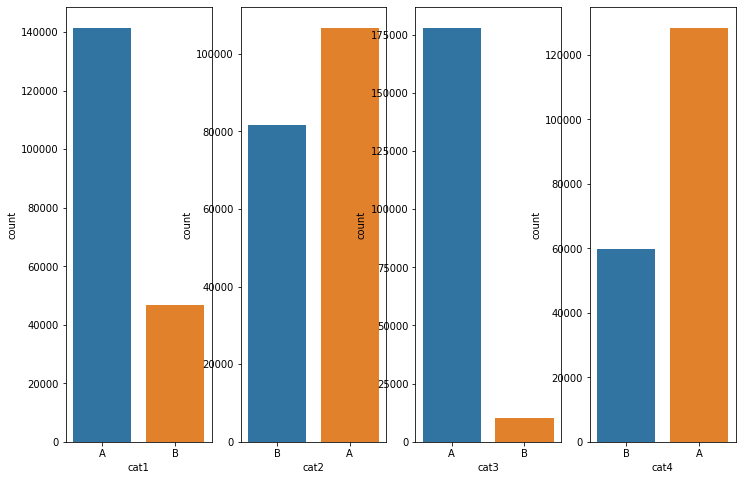

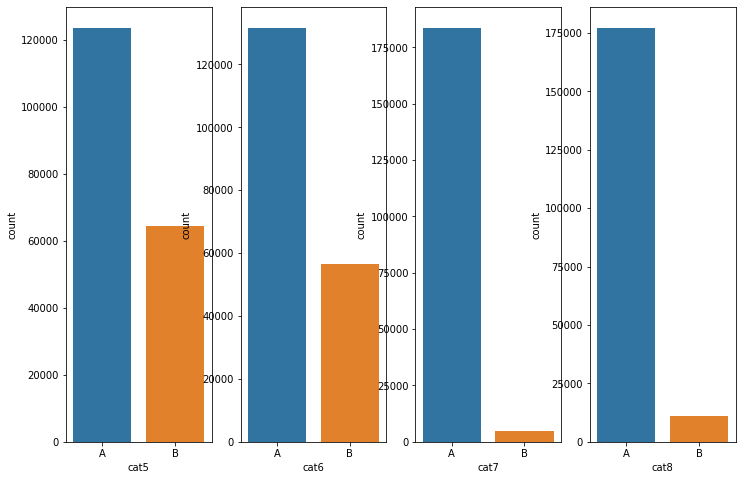

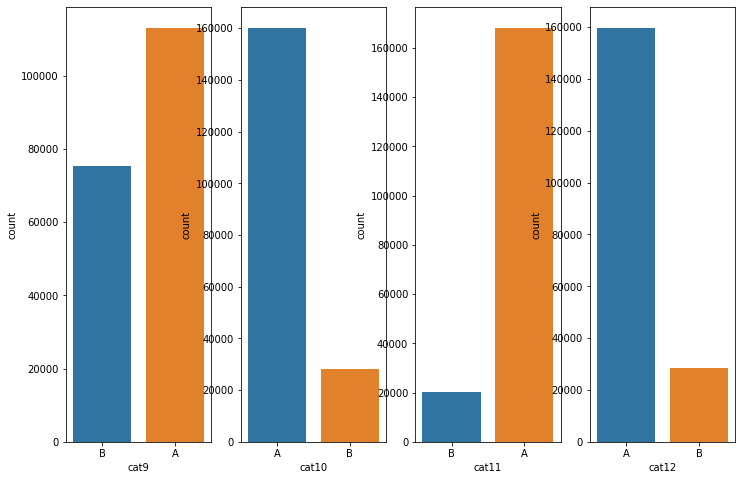

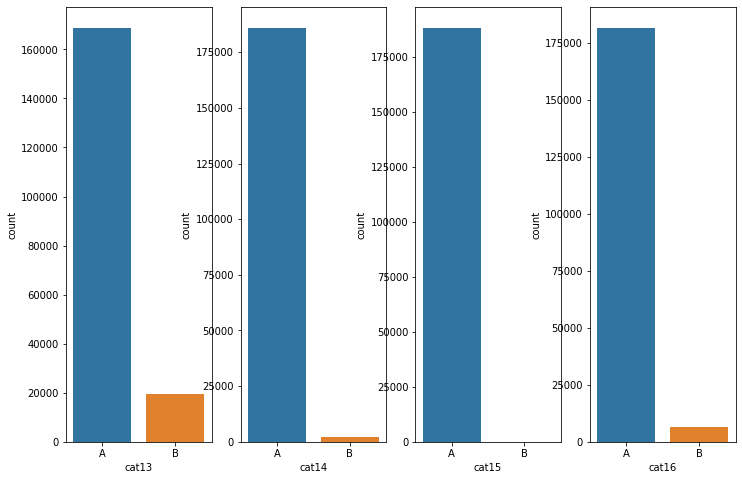

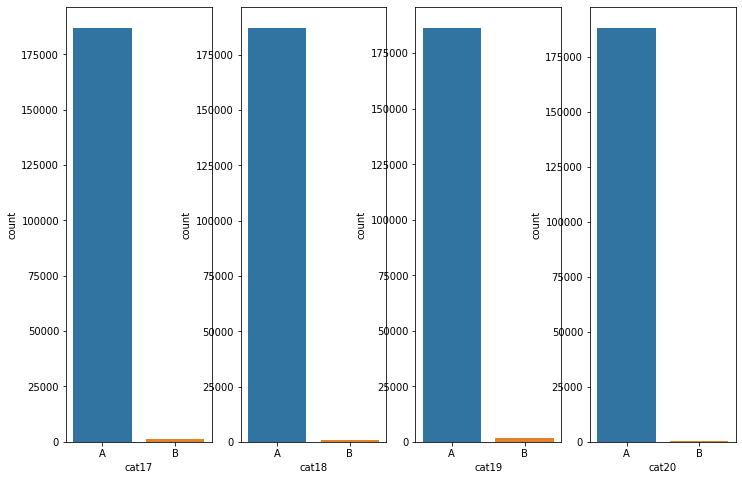

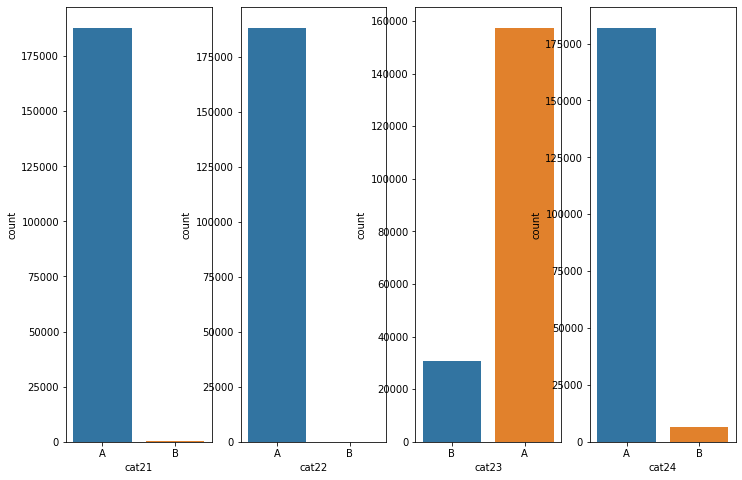

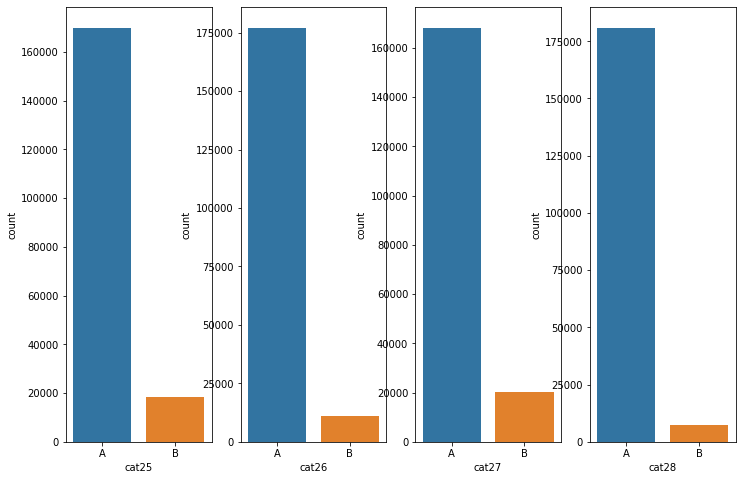

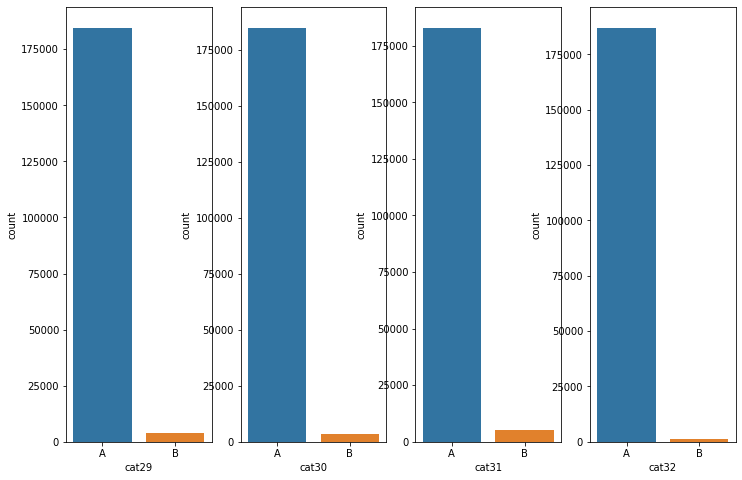

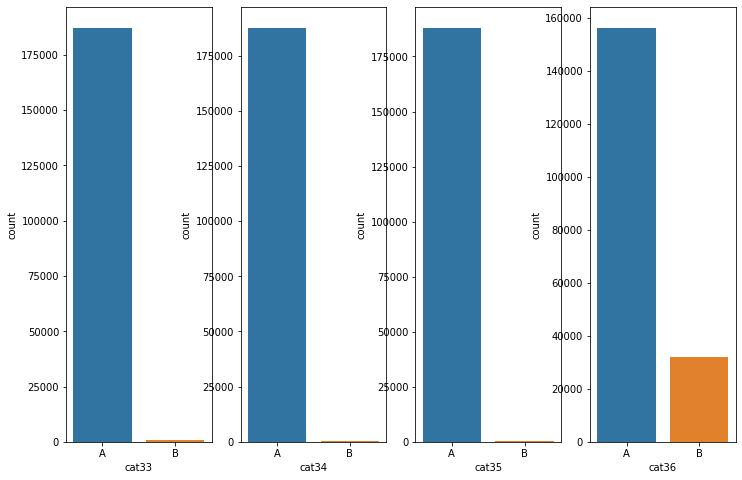

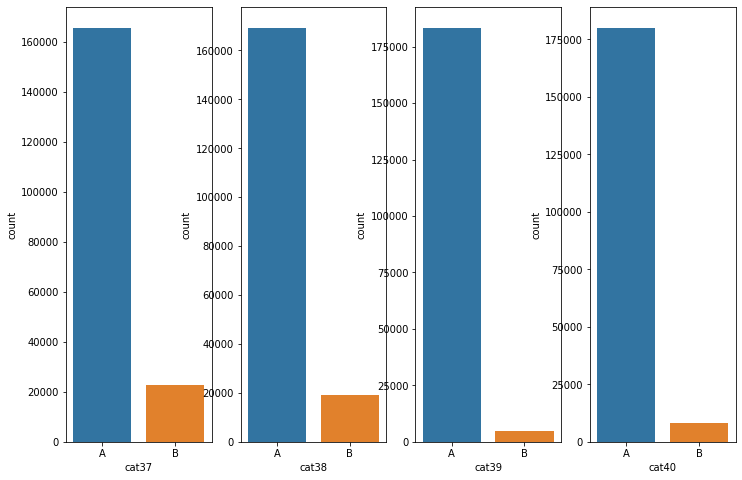

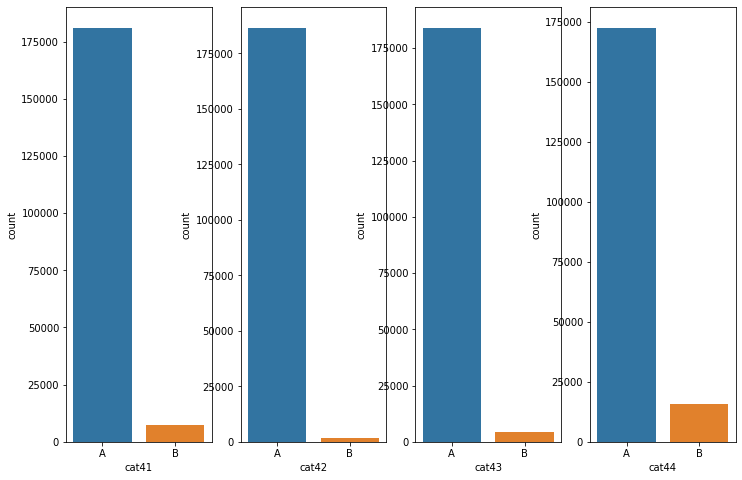

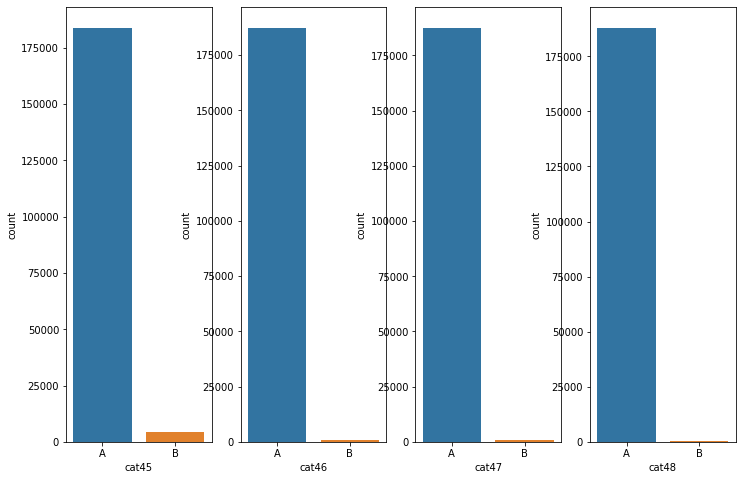

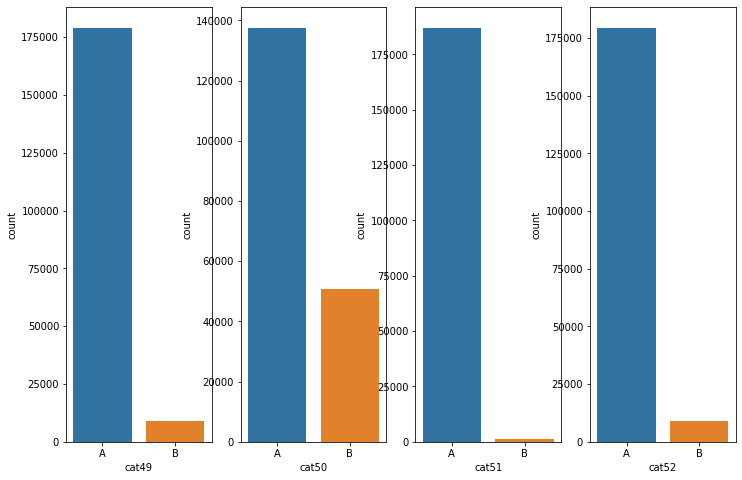

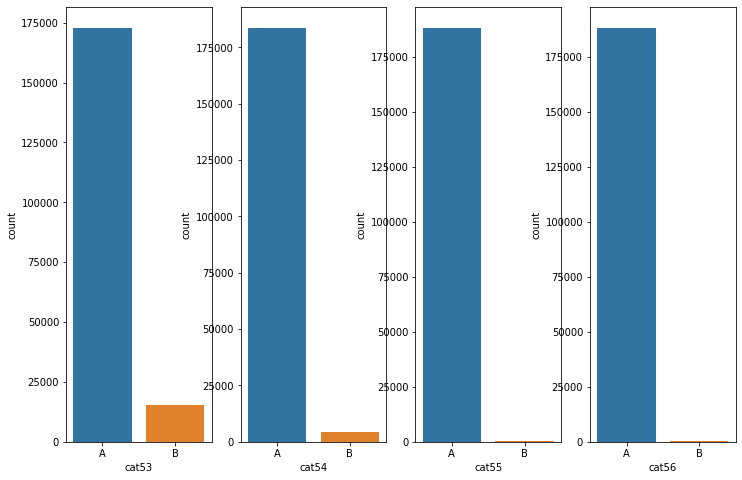

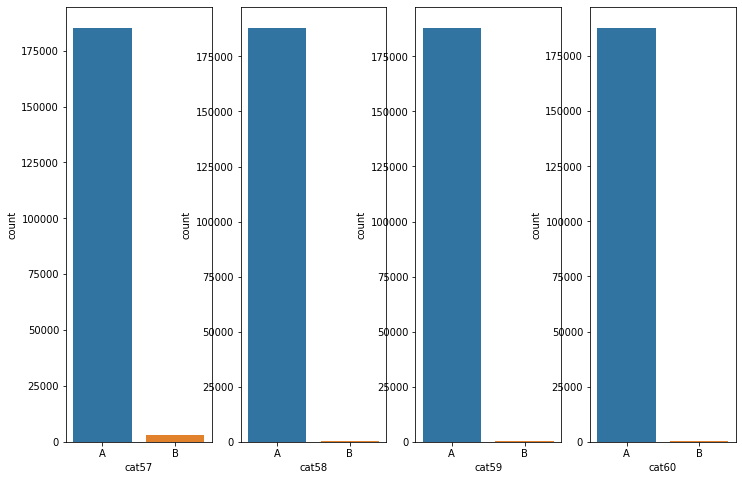

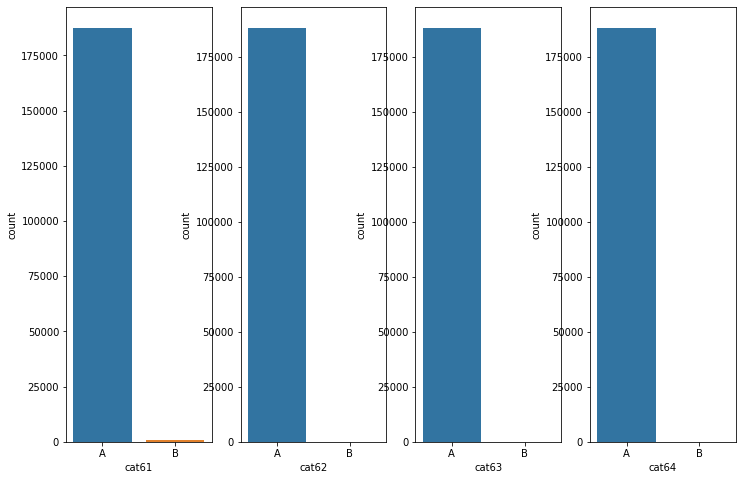

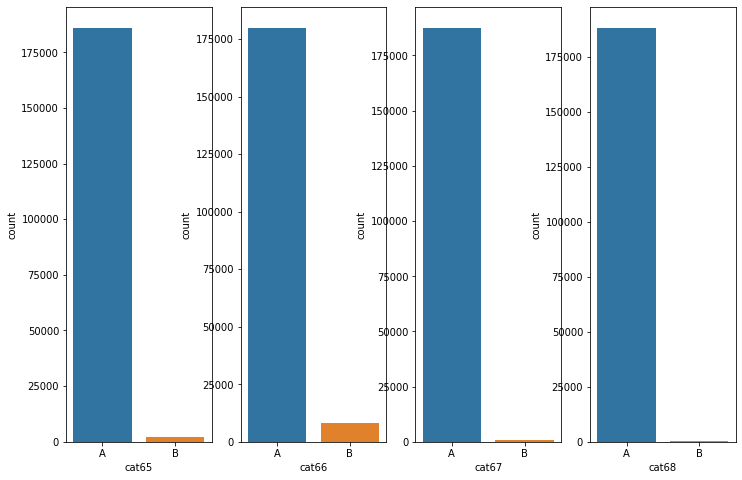

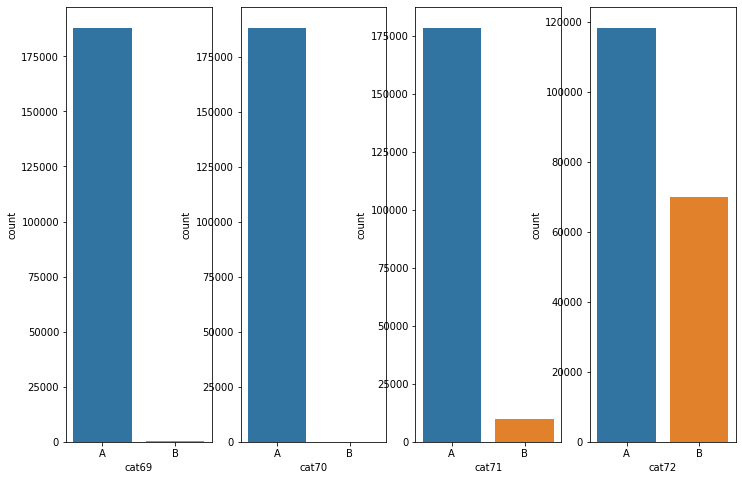

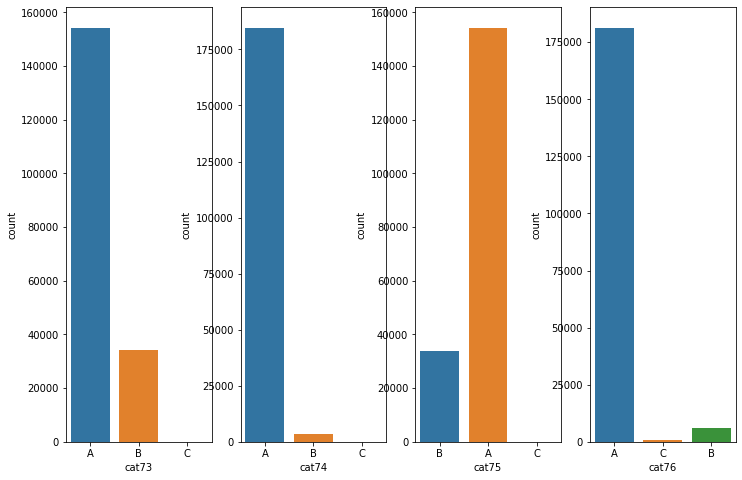

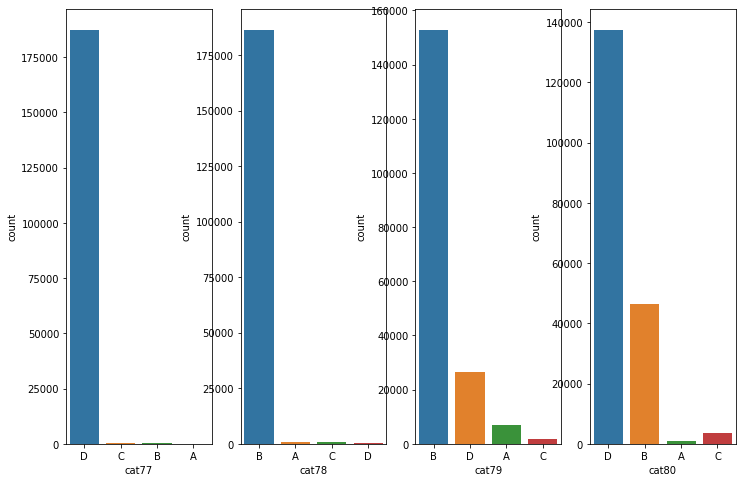

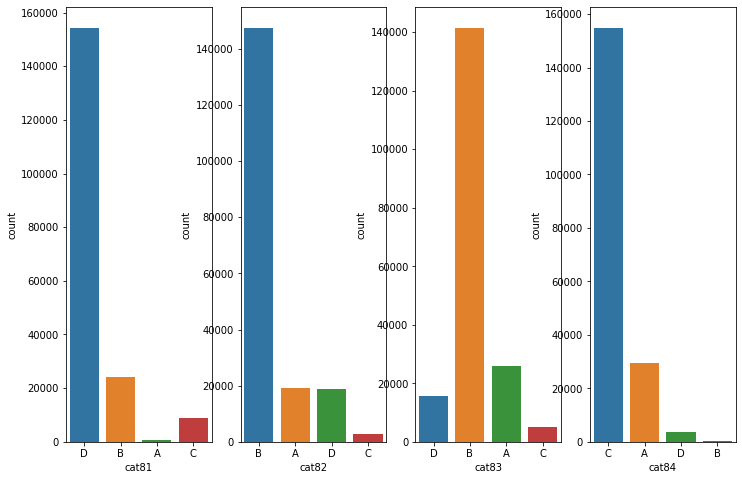

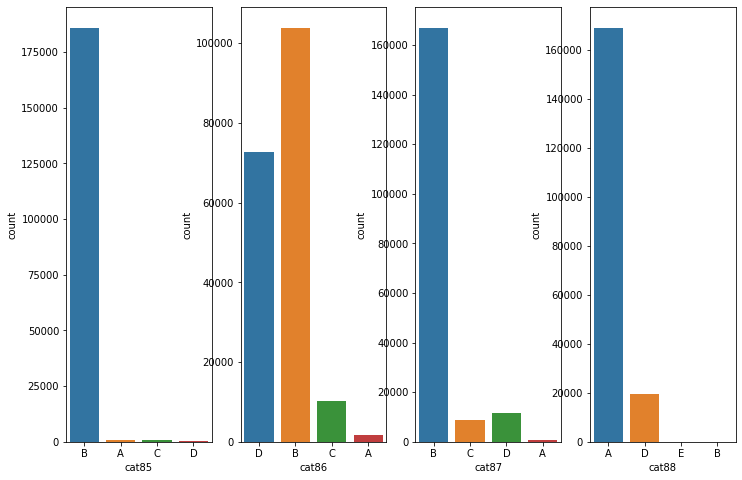

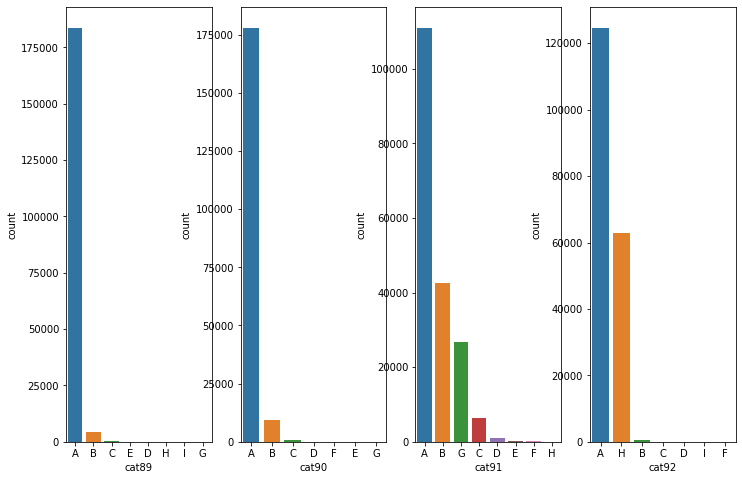

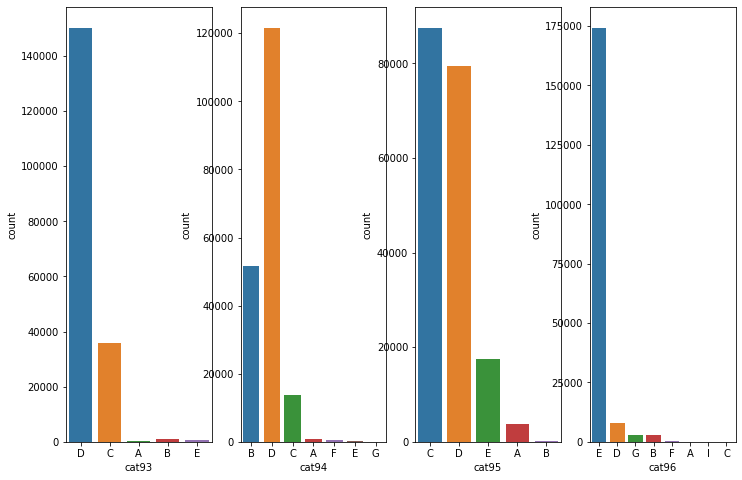

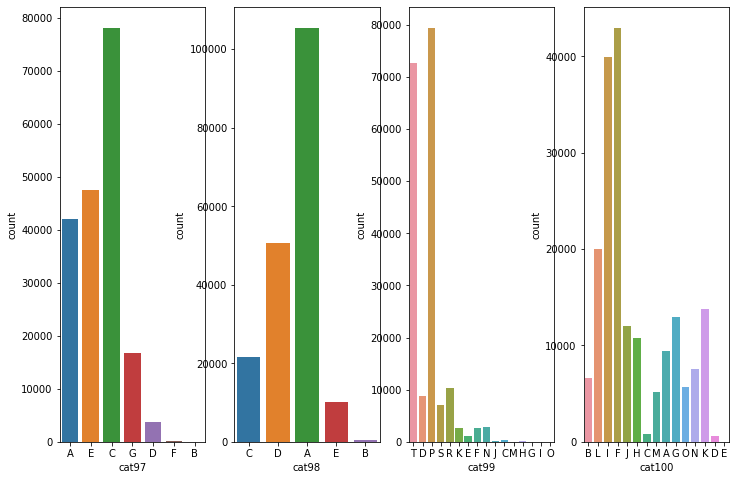

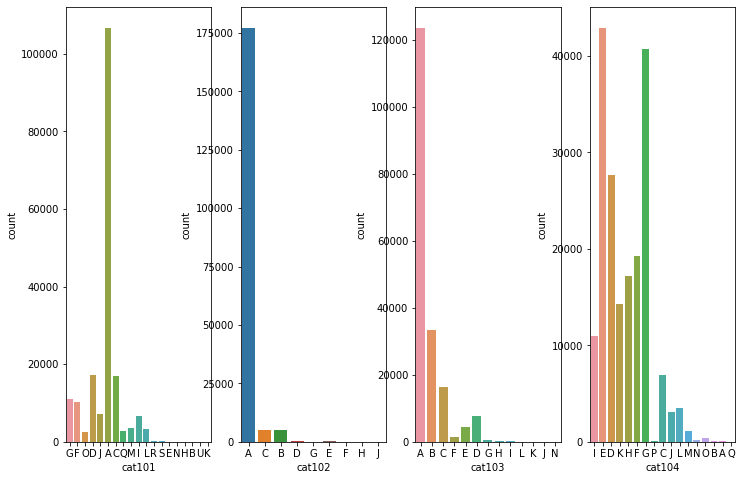

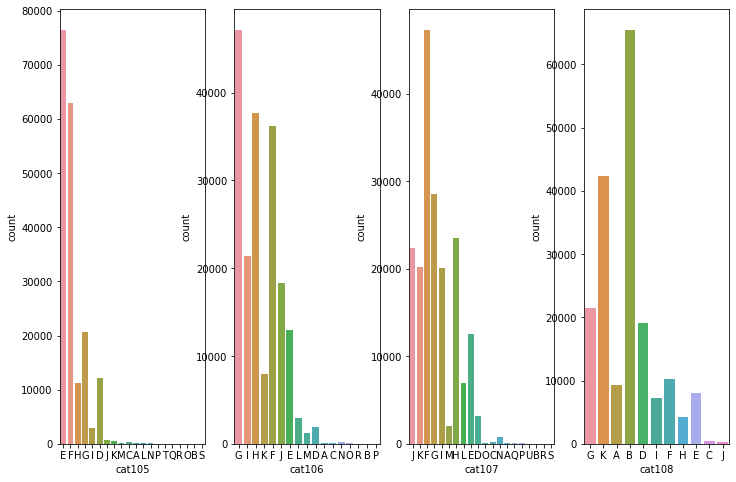

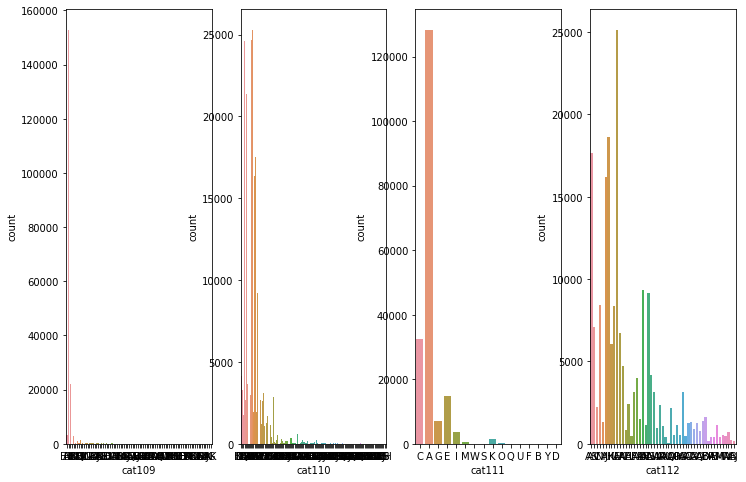

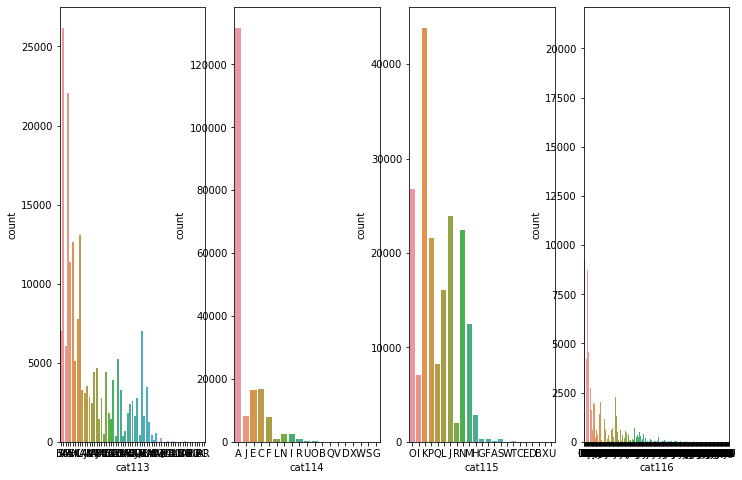

In [9]:
# Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cat_cols[i*n_cols+j], data=claim_details, ax=ax[j])

#cat1 to cat72 have only two labels A and B. In most of the cases, B has very few entries
#cat73 to cat 108 have more than two labels
#cat109 to cat116 have many labels

Insight:<br>
cat1 to cat72 have only two labels A and B. In most of the cases, B has very few entries; 
cat73 to cat 108 have more than two labels; 
cat109 to cat116 have many labels; 


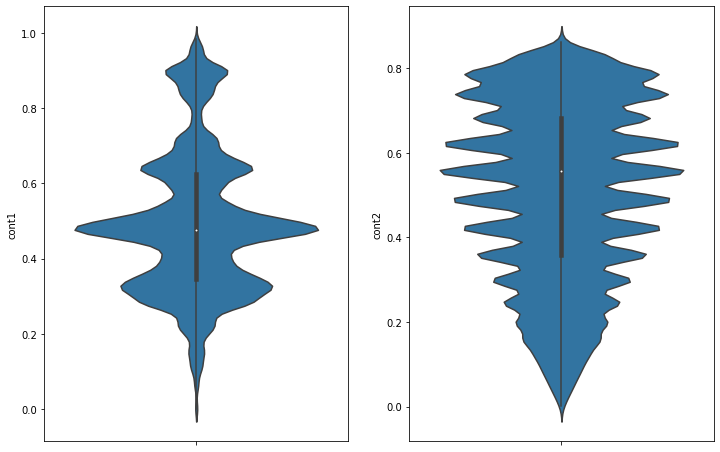

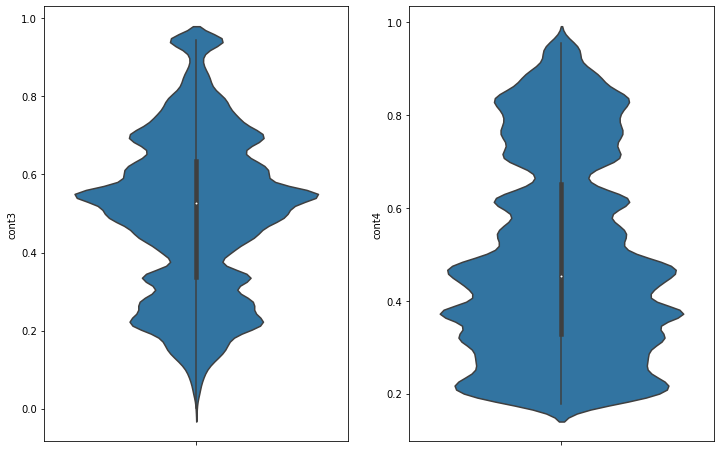

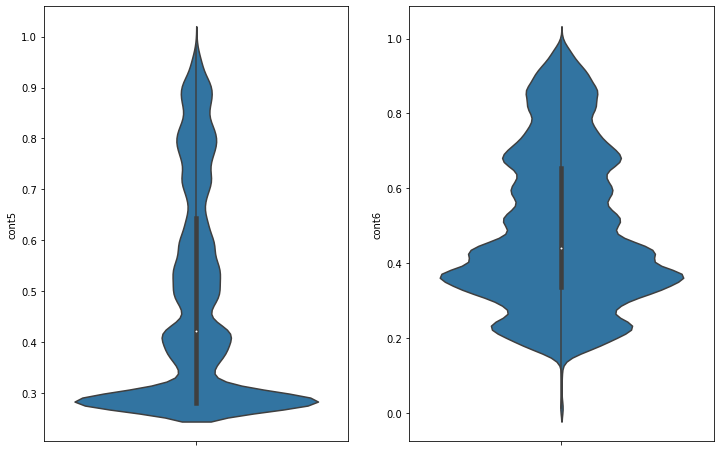

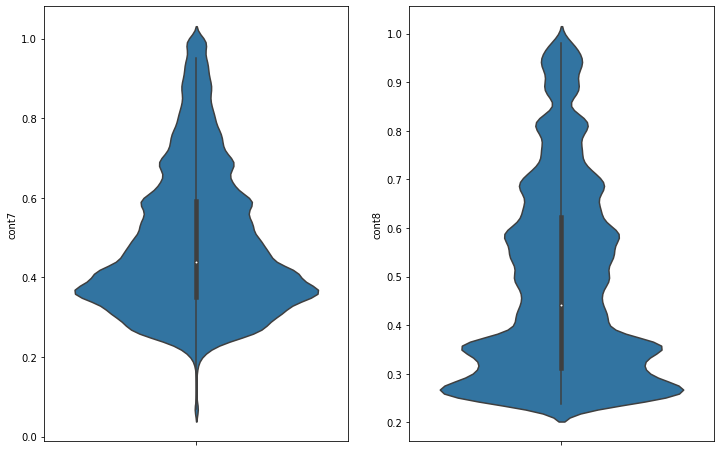

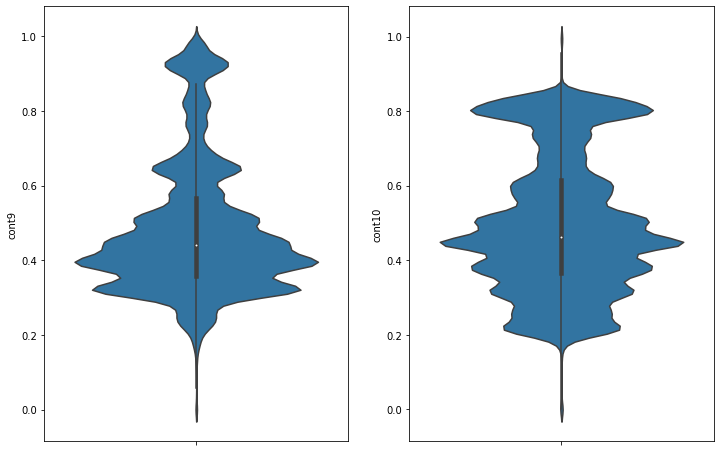

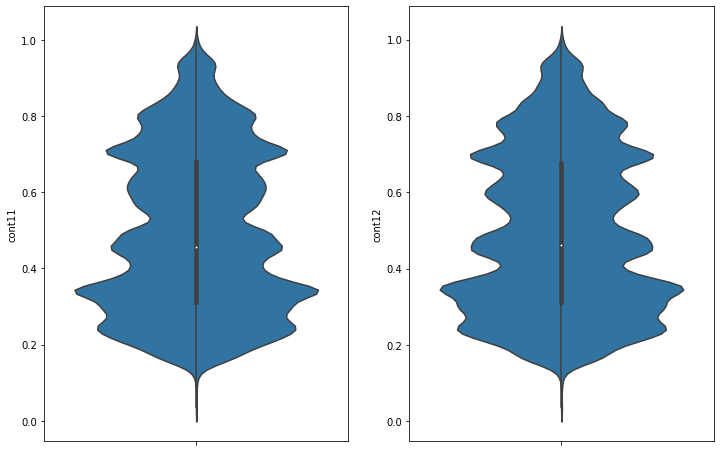

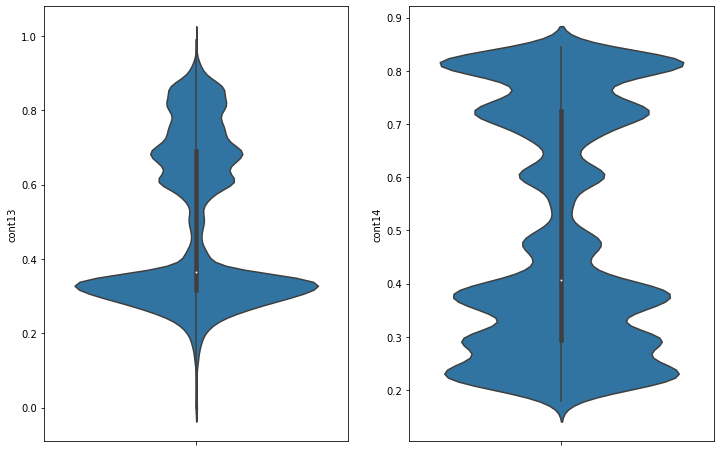

In [10]:
# Plot violin for all attributes in a 7x2 grid
# violin plot: a combination of box and density plots
n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=con_cols[i*n_cols+j], data=claim_details, ax=ax[j])

### Target variable

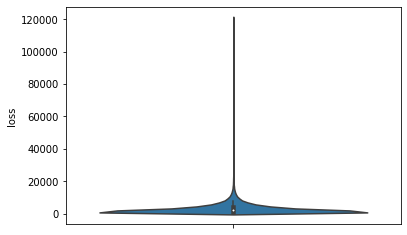

In [11]:
sns.violinplot(data=claim_details,y=claim_details["loss"])
plt.show()

If the response variable is skewed, the model will be trained on a much larger number of low cost claims, and will be less likely to successfully predict the price for the most expensive claims.

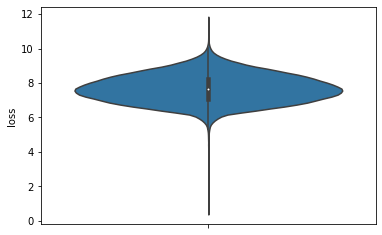

In [12]:
#log1p function applies log(1+x) to all elements of the column
loss = np.log1p(claim_details["loss"])
sns.violinplot(data=claim_details,y=loss)
plt.show()

# Plot shows that skew is corrected to a large extent

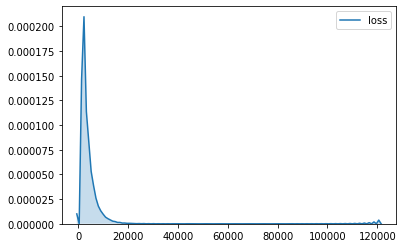

In [13]:
sns.kdeplot(claim_details['loss'], shade=True)

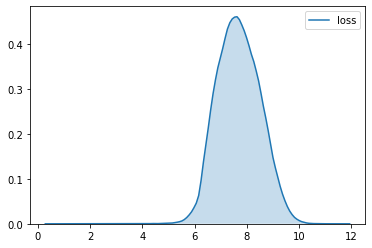

In [14]:
sns.kdeplot(loss, shade=True)

Notes:<br>
We found the terget variable have the problem with skewed data, so we used Log Transform to make it normal.


## Feature Selection
* Categorical
* Numerical

### Numerical Features - corelation analysis

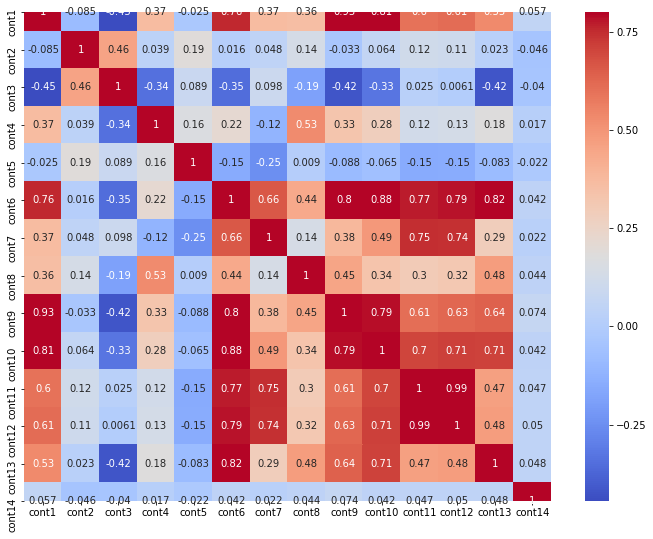

In [15]:
corrmat = claim_details[con_cols].corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='coolwarm')
plt.show()

In [43]:
corr_thres = 0.8
# high_corr_pairs = corrmat[(abs(corrmat) > corr_thres) & (abs(corrmat) < 1)].stack().drop_duplicates()
high_corr_pairs = corrmat[(abs(corrmat) > corr_thres) ].stack().drop_duplicates()
high_corr_pairs

cont1   cont1     1.000000
        cont9     0.929912
        cont10    0.808551
cont6   cont10    0.883351
        cont13    0.815091
cont11  cont12    0.994384
dtype: float64

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. We need to fix it by remove the some variables and only keep one in thee correlation group.

In [17]:
variance_sorted = claim_details[con_cols].var().sort_values(ascending=False)
variance_sorted

cont14    0.049501
cont13    0.045274
cont4     0.044644
cont11    0.043989
cont12    0.043860
cont5     0.043692
cont2     0.042933
cont6     0.042137
cont3     0.040846
cont8     0.039749
cont1     0.035209
cont10    0.034550
cont9     0.033000
cont7     0.031844
dtype: float64

We removed the corralted features that have lower variance

In [18]:
drop_cols = []
drop_cols.append('cont12')
drop_cols.append('cont6')
drop_cols.append('cont10')
drop_cols.append('cont9')

In [19]:
for item in drop_cols: con_cols.remove(item)

In [20]:
con_cols

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont7',
 'cont8',
 'cont11',
 'cont13',
 'cont14']

### Categorical features 

In [21]:
from sklearn.feature_selection import VarianceThreshold
var_thres = 0.2
catvar_selector = VarianceThreshold(threshold=var_thres)


### 1. Label Encoding (Factorizing)

In [22]:
from sklearn import preprocessing
LBL = preprocessing.LabelEncoder()
start=time.time()
LE_map=dict()
for cat_col in cat_cols:
    claim_details[cat_col] = LBL.fit_transform(claim_details[cat_col])
    LE_map[cat_col]=dict(zip(LBL.classes_, LBL.transform(LBL.classes_)))
print ('Label enconding finished in %f seconds' % (time.time()-start))

Label enconding finished in 28.739823 seconds


In [23]:
LE_map

{'cat1': {'A': 0, 'B': 1},
 'cat2': {'A': 0, 'B': 1},
 'cat3': {'A': 0, 'B': 1},
 'cat4': {'A': 0, 'B': 1},
 'cat5': {'A': 0, 'B': 1},
 'cat6': {'A': 0, 'B': 1},
 'cat7': {'A': 0, 'B': 1},
 'cat8': {'A': 0, 'B': 1},
 'cat9': {'A': 0, 'B': 1},
 'cat10': {'A': 0, 'B': 1},
 'cat11': {'A': 0, 'B': 1},
 'cat12': {'A': 0, 'B': 1},
 'cat13': {'A': 0, 'B': 1},
 'cat14': {'A': 0, 'B': 1},
 'cat15': {'A': 0, 'B': 1},
 'cat16': {'A': 0, 'B': 1},
 'cat17': {'A': 0, 'B': 1},
 'cat18': {'A': 0, 'B': 1},
 'cat19': {'A': 0, 'B': 1},
 'cat20': {'A': 0, 'B': 1},
 'cat21': {'A': 0, 'B': 1},
 'cat22': {'A': 0, 'B': 1},
 'cat23': {'A': 0, 'B': 1},
 'cat24': {'A': 0, 'B': 1},
 'cat25': {'A': 0, 'B': 1},
 'cat26': {'A': 0, 'B': 1},
 'cat27': {'A': 0, 'B': 1},
 'cat28': {'A': 0, 'B': 1},
 'cat29': {'A': 0, 'B': 1},
 'cat30': {'A': 0, 'B': 1},
 'cat31': {'A': 0, 'B': 1},
 'cat32': {'A': 0, 'B': 1},
 'cat33': {'A': 0, 'B': 1},
 'cat34': {'A': 0, 'B': 1},
 'cat35': {'A': 0, 'B': 1},
 'cat36': {'A': 0, 'B': 1},
 

In [24]:
print(claim_details[cat_cols].shape)

# We remove some categorical features
reduced_cat_cols = catvar_selector.fit_transform(claim_details[cat_cols])
print(catvar_selector.fit_transform(claim_details[cat_cols]).shape)

(188318, 116)
(188318, 39)


### 2. One Hot Encoding (get dummies)

OHE can be done by either Pandas' get_dummies() or SK Learn's OneHotEncoder. 

* get_dummies is easier to implement (can be used directly on raw categorical features, i.e. strings), but it takes longer time and is not memory efficient.

* OneHotEncoder requires the features being converted to numeric, which has already been done by LabelEncoder in previous step, and is much more efficient (7x faster).

* We will convert the OHE's results to a sparse matrix which uses way less memory as compared to dense matrix. However, not all algorithms and packagers support sparse matrix, e.g. Keras. In that case, we'll need to use other tricks to make it work.

In [25]:
OHE = preprocessing.OneHotEncoder(sparse=True)
start=time.time()
claim_details_sparse=OHE.fit_transform(reduced_cat_cols)
print ('One-hot-encoding finished in %f seconds' % (time.time()-start))

print (claim_details_sparse.shape)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


One-hot-encoding finished in 0.584159 seconds
(188318, 954)


In [26]:
'''
column1: a, b, c, c, a,b,b,b,d,e,f,g,
label: 0,1,2,2,0,1,1,1
onehot: column1_a, column1_b, column1_c,,,,
            1          0         0
            0          1         0
            0          0         1

'''
    

'\ncolumn1: a, b, c, c, a,b,b,b,d,e,f,g,\nlabel: 0,1,2,2,0,1,1,1\nonehot: column1_a, column1_b, column1_c,,,,\n            1          0         0\n            0          1         0\n            0          0         1\n\n'

## Numerical features

We will apply two preprocessings on numeric features:

1. Apply box-cox transformations for skewed numeric features.

2. Scale numeric features so they will fall in the range between 0 and 1.

**Calculate skewness of each numeric features:**

In [27]:
from scipy.stats import skew, boxcox
skewed_cols = claim_details[con_cols].apply(lambda x: skew(x.dropna()))
print(skewed_cols.sort_values())

cont2    -0.310939
cont3    -0.010002
cont14    0.248672
cont11    0.280819
cont13    0.380739
cont4     0.416093
cont1     0.516420
cont8     0.676629
cont5     0.681617
cont7     0.826046
dtype: float64


**Apply box-cox transformations:**

In [28]:
threshold = 0.15
skewed_cols = skewed_cols[abs(skewed_cols) > threshold].index.values
for skewed_col in skewed_cols:
    claim_details[skewed_col], lam = boxcox(claim_details[skewed_col] + 1)

In [29]:
skewed_cols = claim_details[con_cols].apply(lambda x: skew(x.dropna()))
print(skewed_cols.sort_values())

cont2    -0.102176
cont3    -0.010002
cont1     0.003913
cont11    0.023379
cont4     0.051768
cont7     0.054278
cont14    0.067617
cont13    0.093885
cont8     0.124674
cont5     0.205930
dtype: float64


**Apply Standard Scaling:**

In [30]:
SSL = preprocessing.StandardScaler()
for con_col in con_cols:
     claim_details[con_col] = SSL.fit_transform(claim_details[con_col].values.reshape(-1,1))

## Model Building

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

linear_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
dt_reg = DecisionTreeRegressor()
nn_reg = MLPRegressor()

In [32]:
from scipy import sparse
full_data_sparse = sparse.hstack((claim_details_sparse,claim_details[con_cols]), format='csr')
print (full_data_sparse.shape)

(188318, 964)


In [33]:
train_x = full_data_sparse[:claim_size]
# test_x = full_data_sparse[claim_size:]

train_y = np.log(claim_details[:claim_size].loss.values + 200)

ID = claim_details.id[:claim_size].values


In [34]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

def log_mae(y,yhat):
    return mean_absolute_error(np.exp(y), np.exp(yhat))

log_mae_scorer = metrics.make_scorer(log_mae, greater_is_better = False)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=1234)

In [37]:
# Linear Regression

lr = linear_reg.fit(X_train, y_train)

pred_linear_reg = lr.predict(X_val)

log_mae(pred_linear_reg, y_val)

1296.3026324803186

In [38]:
# Decision Tree Regression

dt = dt_reg.fit(X_train, y_train)

pred_linear_reg = dt.predict(X_val)

log_mae(pred_linear_reg, y_val)

1807.3090544781512

In [39]:
# Future work
# Nueral Network Regression

# nn_reg.fit(X_train, y_train)
# pred_linear_reg = nn_reg.predict(X_val)
# log_mae(pred_linear_reg, y_val)